In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('data\sales_prediction.csv')




In [57]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [58]:
df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [60]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [61]:
num_data = df.select_dtypes('object')
num_data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [62]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: xlabel='Item_Weight'>

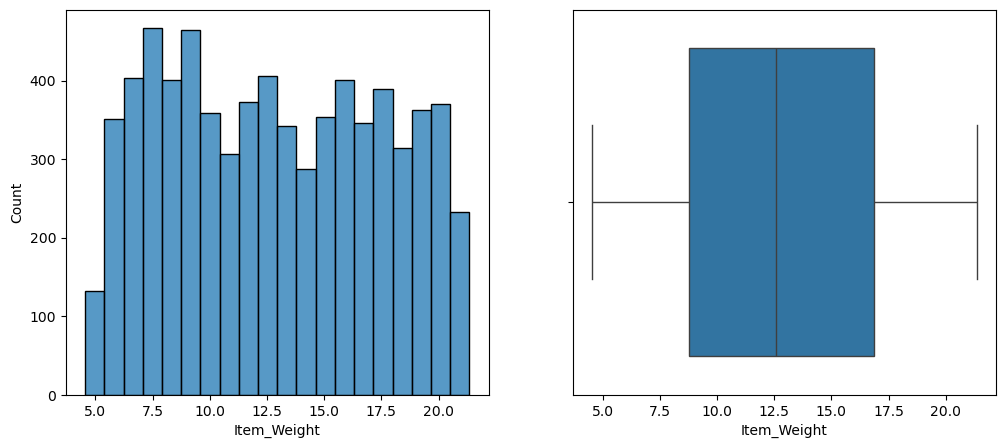

In [63]:
fig,ax= plt.subplots(1,2,figsize=(12,5))

sns.histplot(data =df,x='Item_Weight', ax = ax[0])
sns.boxplot(data =df,x='Item_Weight', ax = ax[1])


In [64]:
def visuliazation_num_feat(Data_frame,col_name):
    fig,ax= plt.subplots(1,2,figsize=(12,5))

    sns.histplot(data =Data_frame ,x=col_name, ax = ax[0])
    sns.boxplot(data =Data_frame ,x=col_name, ax = ax[1])

    

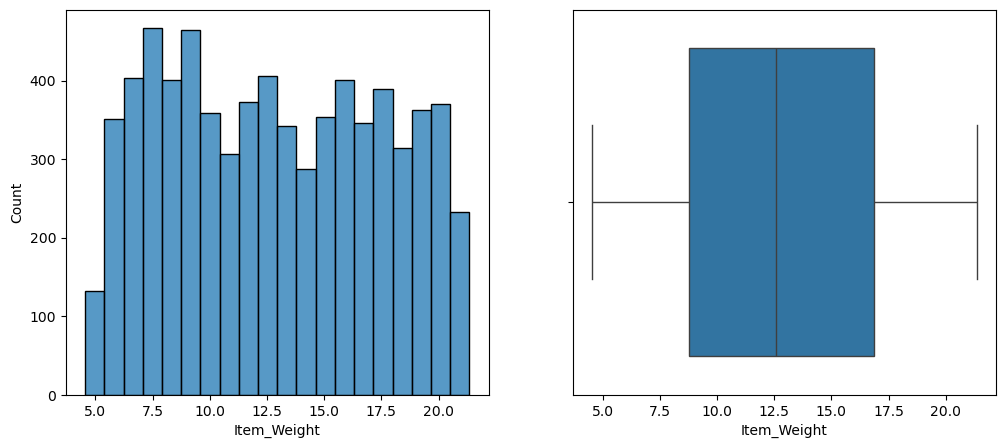

In [65]:
visuliazation_num_feat(df,'Item_Weight')

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_all_numeric(df):
    """
    Visualizes all numeric columns in a DataFrame.
    For each numeric column, plots a histogram and a boxplot side by side.
    """
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    if len(numeric_cols) == 0:
        print("No numeric columns found in the DataFrame.")
        return
    
    # Loop through each numeric column
    for col in numeric_cols:
        print(f"Visualizing: {col}")
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        
        # Histogram
        sns.histplot(data=df, x=col, ax=ax[0], kde=True, color='skyblue')
        ax[0].set_title(f'Histogram of {col}')
        
        # Boxplot
        sns.boxplot(data=df, x=col, ax=ax[1], color='lightgreen')
        ax[1].set_title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()


Visualizing: Item_Weight


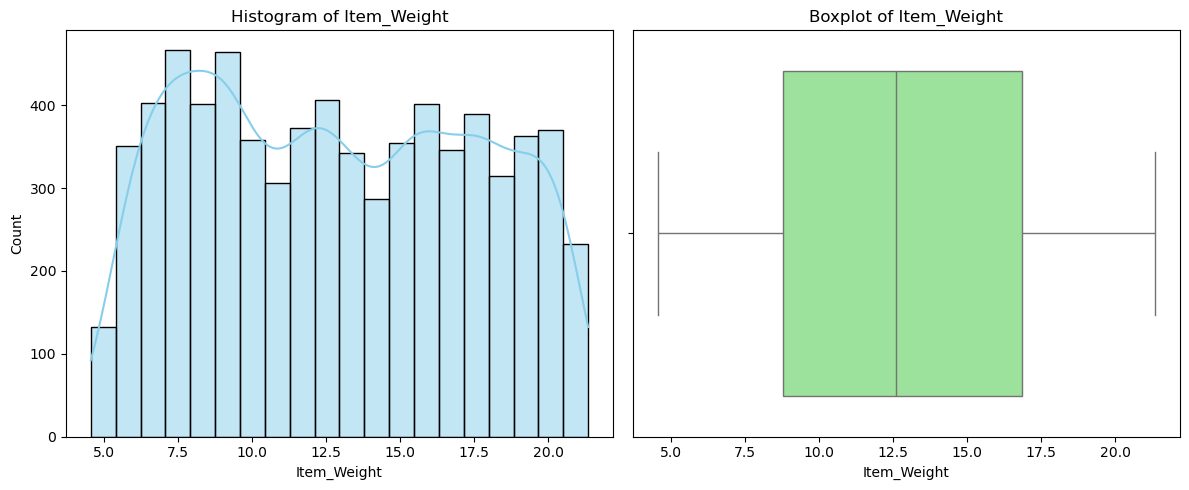

Visualizing: Item_Visibility


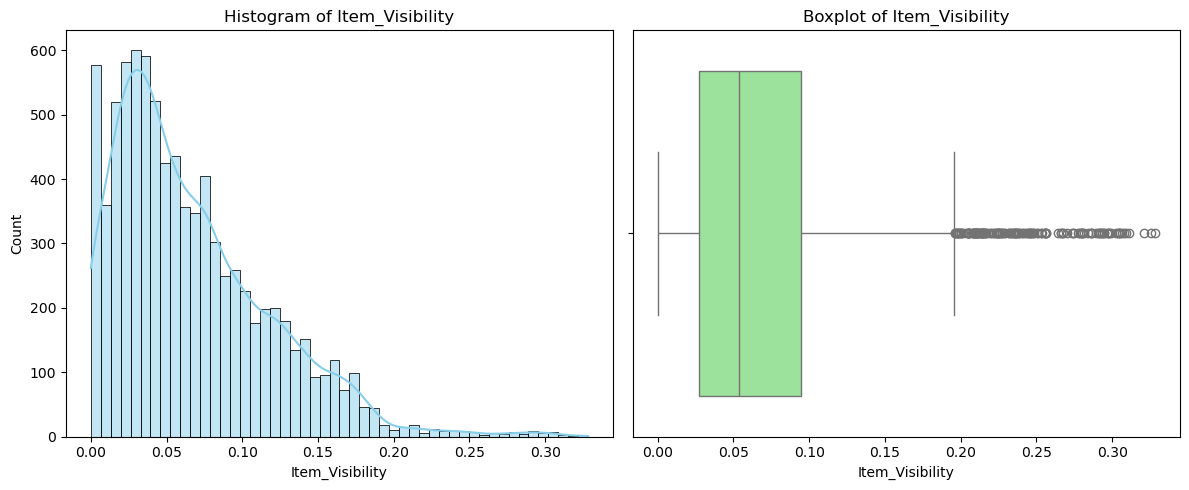

Visualizing: Item_MRP


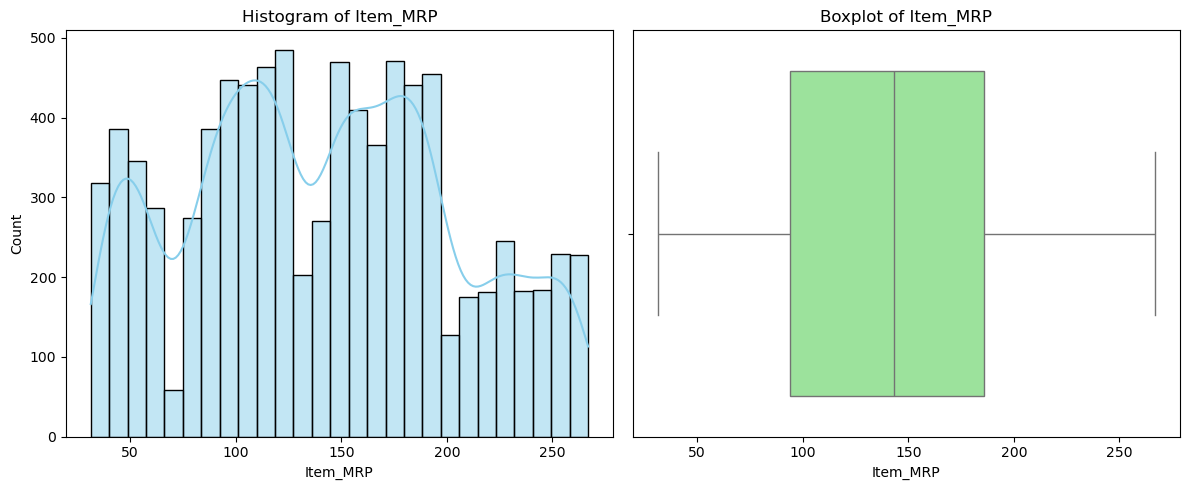

Visualizing: Outlet_Establishment_Year


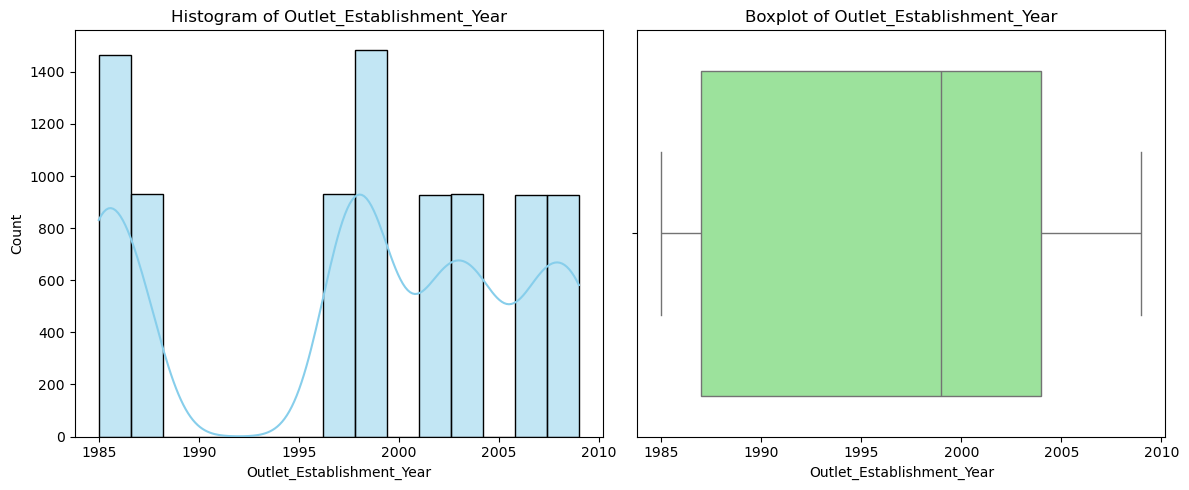

Visualizing: Item_Outlet_Sales


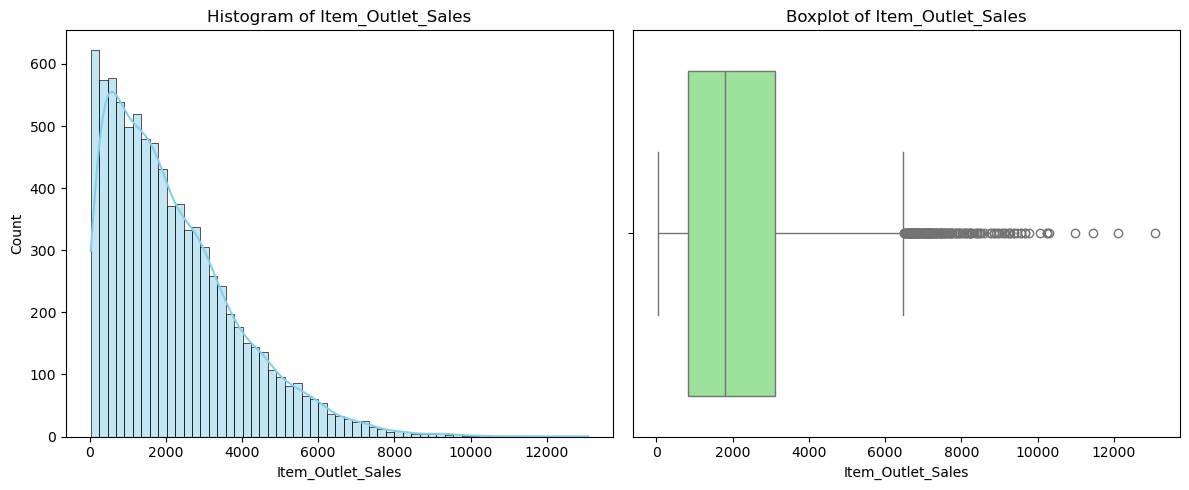

In [67]:
visualize_all_numeric(df)


<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

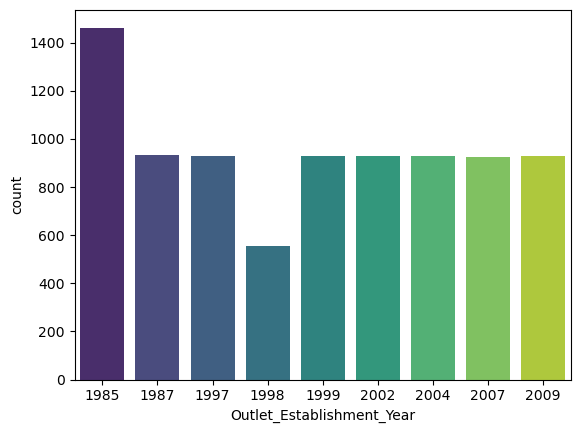

In [68]:
sns.countplot(data=df,x='Outlet_Establishment_Year', palette='viridis')

In [69]:
cat_feat = df.select_dtypes('object')
cat_feat.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [70]:
cat_feat.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [71]:
cat_feat.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [72]:
def unique_colums(data_frame,col):
    cat_feat[col].valuecounts()

In [73]:
unique_colums(cat_feat,)

TypeError: unique_colums() missing 1 required positional argument: 'col'

In [ ]:
# Select all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Loop through each and print value counts
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Column: Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Column: Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Column: Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OU

## Data Wrangling and feature engineering ##

In [ ]:
df['Item_Identifier'].str[:2].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [ ]:
def create_item_type(dataframe):
    dataframe['Item_Type'] = dataframe['Item_Identifier'].str[:2]
    dataframe['Item_Type'] = dataframe['Item_Type'].map({
                                            'FD': 'Food',
                                            'NC':'Non_Consumables',
                                            'DR': 'Drink'
    }) 
    return dataframe

In [ ]:
df1 = df.copy()

In [ ]:
df1.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df1= create_item_type(df1)
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drink,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Food,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Non_Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df1[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
118,DRA12,11.60
2879,DRA24,NaN
1148,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
1267,NCZ53,9.60
1896,NCZ54,NaN


In [ ]:
df1[['Item_Type','Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
754,Drink,6.280
165,Drink,19.500
163,Drink,7.270
158,Drink,13.850
1004,Drink,14.500
...,...,...
1517,Non_Consumables,12.850
265,Non_Consumables,16.350
1578,Non_Consumables,10.695
1187,Non_Consumables,17.750


In [ ]:
#Step 2: Fill in missing values for Item_Weight
 # Logic
 #1st step: Use mapping of item ID weight and fill in missing values
 #2nd step: If completely new item

#i.e item ID not in test live data use item type median(weight) and fill in missing values

ITEM_ID_WEIGHT_PIVOT = df.pivot_table(values='Item_Weight', index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.3),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT =df1.pivot_table(values= 'Item_Weight', index='Item_Type',aggfunc='median').reset_index()
                        
ITEM_TYPE_WEIGHT_MAPPING= dict(zip(ITEM_TYPE_WEIGHT_PIVOT ['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()



dict_items([('Drink', 11.8), ('Food', 12.6), ('Non_Consumables', 13.0)])

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT =df1.pivot_table(values= 'Item_Weight', index='Item_Type',aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_PIVOT


,Item_Type,Item_Weight
0,Drink,11.8
1,Food,12.6
2,Non_Consumables,13.0


In [ ]:
def impute_item_weight(data_frame):
    #1st logic item id weight
    data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Weight'].fillna(data_frame.loc[:, 'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
     #2nd logic item type weight if any still missing
    data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Weight'].fillna(data_frame.loc[:, 'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))
    return data_frame

In [ ]:
df1 = impute_item_weight(df1)
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df1.groupby(by=['Outlet_Type', 'Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [ ]:
from scipy.stats import mode

In [ ]:
 #Step 3: Impute missing values for Outlet_Size
# Logic:
#1st step: Use mapping of Outlet Type mode (Outlet Size) and fill in missing values


OUTLET_TYPE_SIZE_PIVOT = df1.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode()[0]
).reset_index()


In [ ]:
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING.items()


dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

In [ ]:
def impute_outlet_size(dataframe):
    dataframe.loc[:,'Outlet_Size']= dataframe.loc[:,'Outlet_Size'].fillna(dataframe.loc[:,'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
    
    return dataframe

In [ ]:
df1 = impute_outlet_size(df1)
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Drink,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Non_Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Food,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Food,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Non_Consumables,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Food,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df1.groupby(by=['Outlet_Type', 'Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small          1083
Supermarket Type1  High            932
                   Medium          930
                   Small          3715
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [ ]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
# making item fat contents cat consistent

def stardardize_Item_Fat_Content (dataframe):
    dataframe['Item_Fat_Content'] =dataframe['Item_Fat_Content'].replace({
                                                                'Low Fat':'Low_Fat',
                                                                 'LF':'Low_Fat',
                                                                 'reg':'Regular',
                                                                 'low fat':'Low_Fat'
    
    })
    return dataframe

In [ ]:
stardardize_Item_Fat_Content(df1)
df1.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low_Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drink,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low_Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low_Fat,0.000000,Non_Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df1['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low_Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
df1.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              728
                 Regular               71
Food             Low_Fat             3190
                 Regular             2935
Non_Consumables  Low_Fat             1599
dtype: int64

In [ ]:
# correct item fat for non_consumables

def correct_Item_Fat_Content(dataframe):
    dataframe.loc[dataframe['Item_Type']=='Non_Consumables','Item_Fat_Content']= 'Non_Edible'
    return dataframe

In [ ]:
correct_Item_Fat_Content(df1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low_Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Drink,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low_Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Non_Edible,0.000000,Non_Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low_Fat,0.056783,Food,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Food,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Non_Edible,0.035186,Non_Consumables,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Food,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df1.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              728
                 Regular               71
Food             Low_Fat             3190
                 Regular             2935
Non_Consumables  Non_Edible          1599
dtype: int64

# prepare dataset for ML #

In [ ]:

def prepare_dataset(data_frame):
#Step 1: Create Item Type
    create_item_type(data_frame)
    #step 2: Fill in missing values for Item_Weight
    impute_item_weight(data_frame)

    #Step 3: Impute missing values for Outlet_Size
    impute_outlet_size(data_frame)

    # Step 4: Make Item Fat Content categories consistent
    stardardize_Item_Fat_Content(data_frame)

    #Step 5: Correct Item fat content for non-consumables
    correct_Item_Fat_Content(data_frame)

    return data_frame

# Handling Categorical dat #

In [ ]:
cat_feat = df1.select_dtypes(include=['object'])
cat_feat.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low_Fat,Food,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Drink,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low_Fat,Food,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Food,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Non_Edible,Non_Consumables,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low_Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drink,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low_Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Non_Edible,0.000000,Non_Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [74]:
cleaned_df=df1.copy()

In [75]:
# after cleaning
cleaned_df.to_csv("cleaned_data.csv", index=False)
